In [3]:
using BenchmarkTools
using Plots

include("../src/Cosmojuly.jl")
import .Cosmojuly as cj

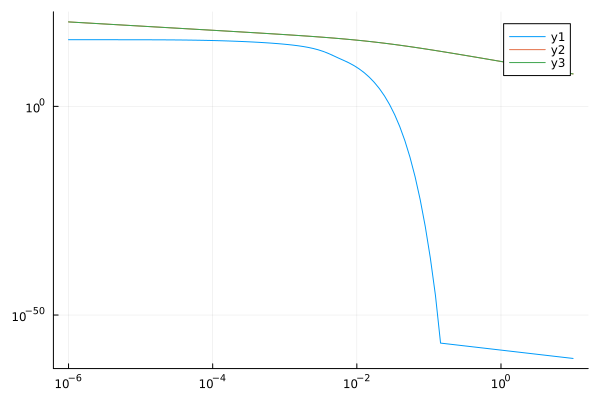

In [23]:
x = 10.0.^range(-6, 1, 100)
plot(x, cj.ρ_baryons_spherical.(x), xscale=:log10, yscale=:log10)
plot!(x, cj.ρ_halo.(x, cj.galactic_halo()), xscale=:log10, yscale=:log10)
plot!(x, cj.ρ_galaxy_spherical.(x), xscale=:log10, yscale=:log10)

In [10]:
cj.lookback_redshift(1e+10 * 3600 * 24 * 365.25)

1.7033721577909982

In [11]:
m = 10 .^(range(-12,stop=15,length=500))
plot(m,  m.^2 .* cj.dn_dM.(m, 0, cj.SharpK, cj.PressSchechter), xscale=:log10, yscale=:log10)
plot!(m,  m.^2 .* cj.dn_dM.(m, 0, cj.SharpK, cj.PressSchechter), xscale=:log10, yscale=:log10)